# <center>Heart Disease EDA and Prediction Models</center>

## Importing Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


## Loading Dataset

In [36]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Creating dataset copy

In [37]:
data2 = data.copy()

# Data Preprocessing
## Mapping values for easier understanding

In [38]:
data['sex'] = data['sex'].map({1:'Male', 0:'Female'})
data['exng'] = data['exng'].map({1:'Yes', 0:'No'})
data['cp'] = data['cp'].map({0:'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Asymptomatic'})
data['fbs'] = data['fbs'].map({1:'true',0:'false'})
data['restecg'] = data['restecg'].map({0:'Normal', 1:'ST-T Wave Abnormality', 2:'Showing Probable or Definite Left Ventricular Hypertrophy'})
data['output'] = data['output'].map({0:'Absence of Heart Disease', 1:'Heart Disease Present'})
data.sample(5)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
197,67,Male,Typical Angina,125,254,true,ST-T Wave Abnormality,163,No,0.2,1,2,3,Absence of Heart Disease
223,56,Female,Typical Angina,200,288,true,Normal,133,Yes,4.0,0,2,3,Absence of Heart Disease
293,67,Male,Non-Anginal Pain,152,212,false,Normal,150,No,0.8,1,0,3,Absence of Heart Disease
142,42,Female,Non-Anginal Pain,120,209,false,ST-T Wave Abnormality,173,No,0.0,1,0,2,Heart Disease Present
170,56,Male,Non-Anginal Pain,130,256,true,Normal,142,Yes,0.6,1,1,1,Absence of Heart Disease


# EDA
<br>

## Correlation Heat Map

<AxesSubplot:>

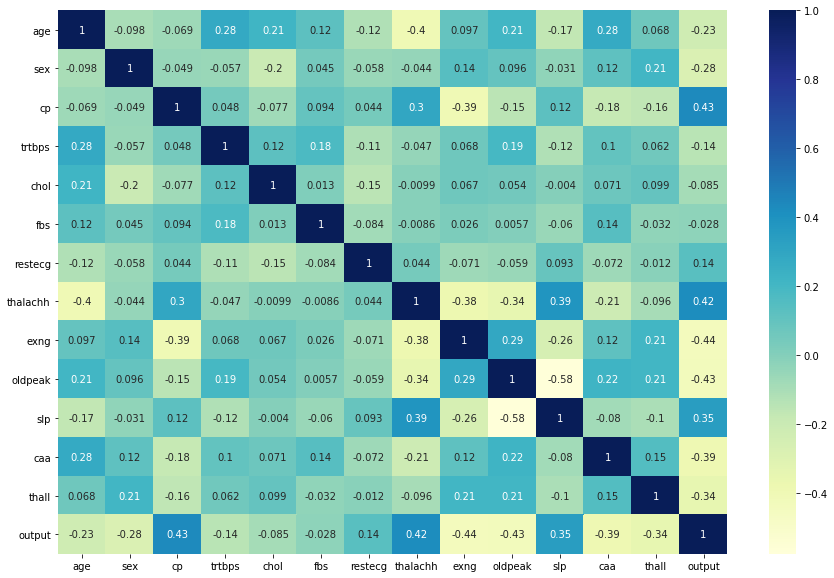

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(),annot=True,cmap='YlGnBu')

The heatmap suggests that there is a correlation with the presense of heart disease with the variables of cp (chest pain type), thallachh (max heart rate achieved), and slp (peak exercise ST segment)

## Countplots

<AxesSubplot:title={'center':'Presence of Heart Disease by Thalassemia'}, xlabel='output', ylabel='count'>

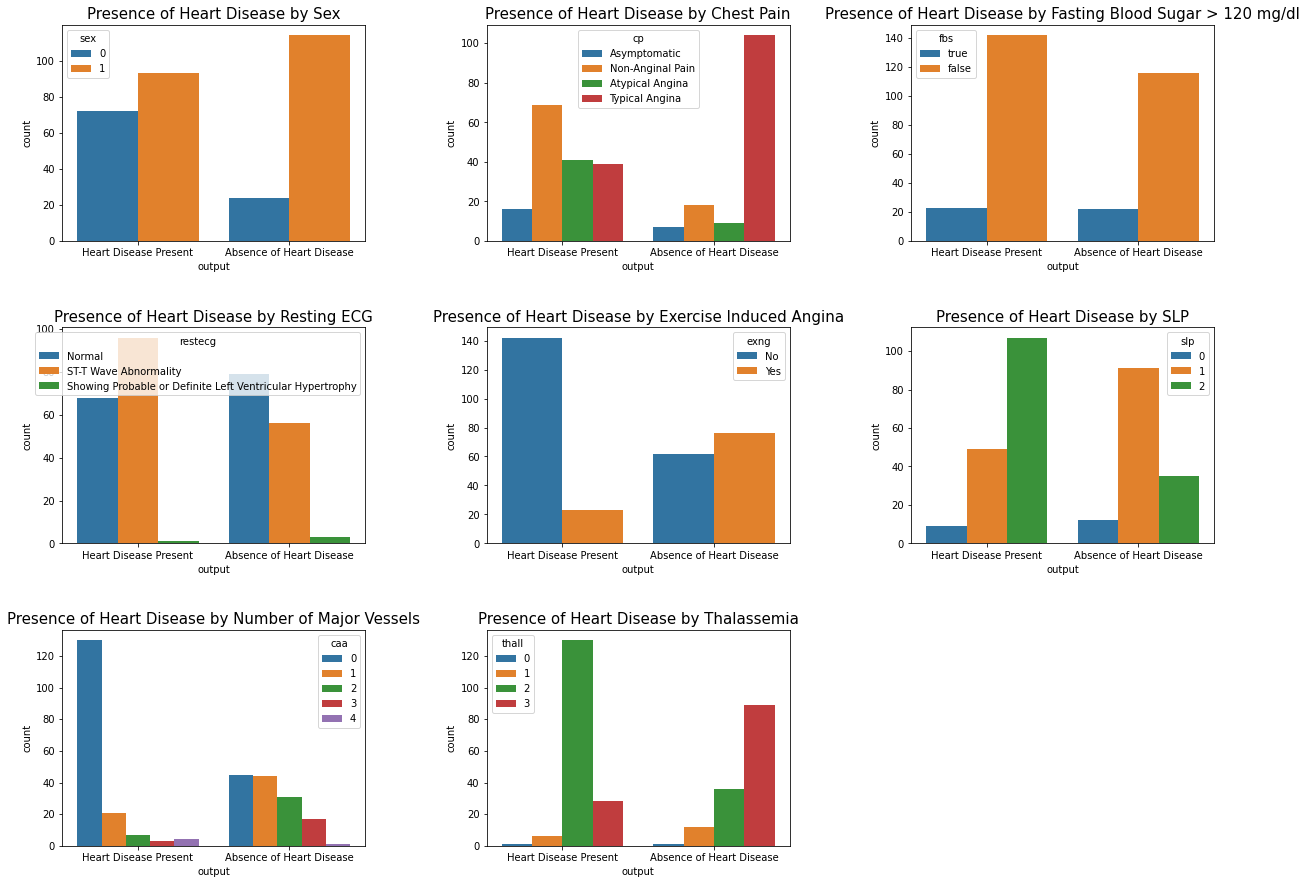

In [25]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(6,3,1)
plt.title('Presence of Heart Disease by Sex',fontsize=15)
sns.countplot(data['output'], hue=data['sex'])

plt.subplot(6,3,2)
plt.title('Presence of Heart Disease by Chest Pain',fontsize=15)
sns.countplot(data['output'], hue=data['cp'])

plt.subplot(6,3,3)
plt.title('Presence of Heart Disease by Fasting Blood Sugar > 120 mg/dl',fontsize=15)
sns.countplot(data['output'],hue=data['fbs'])

plt.subplot(6,3,4)
plt.title('Presence of Heart Disease by Resting ECG',fontsize=15)
sns.countplot(data['output'],hue = data['restecg'])

plt.subplot(6,3,5)
plt.title('Presence of Heart Disease by Exercise Induced Angina',fontsize=15)
sns.countplot(data['output'],hue=data['exng'])

plt.subplot(6,3,6)
plt.title('Presence of Heart Disease by SLP',fontsize=15)
sns.countplot(data['output'],hue=data['slp'])

plt.subplot(6,3,7)
plt.title('Presence of Heart Disease by Number of Major Vessels',fontsize=15)
sns.countplot(data['output'],hue=data['caa'])

plt.subplot(6,3,8)
plt.title('Presence of Heart Disease by Thalassemia',fontsize=15)
sns.countplot(data['output'],hue=data['thall'])

* Patients with non-anginal chest pain have a higher chance of heart disease
* Patients with 0 major vessels have a very high chance of heart disease
* Male patients have a higher chance of heart disease
* Patients with a fixed defect from Thalassemia have a higher chance of heart disease
* Patients without exersiced induced angina have a higher chance of heart disease

## Pairplot

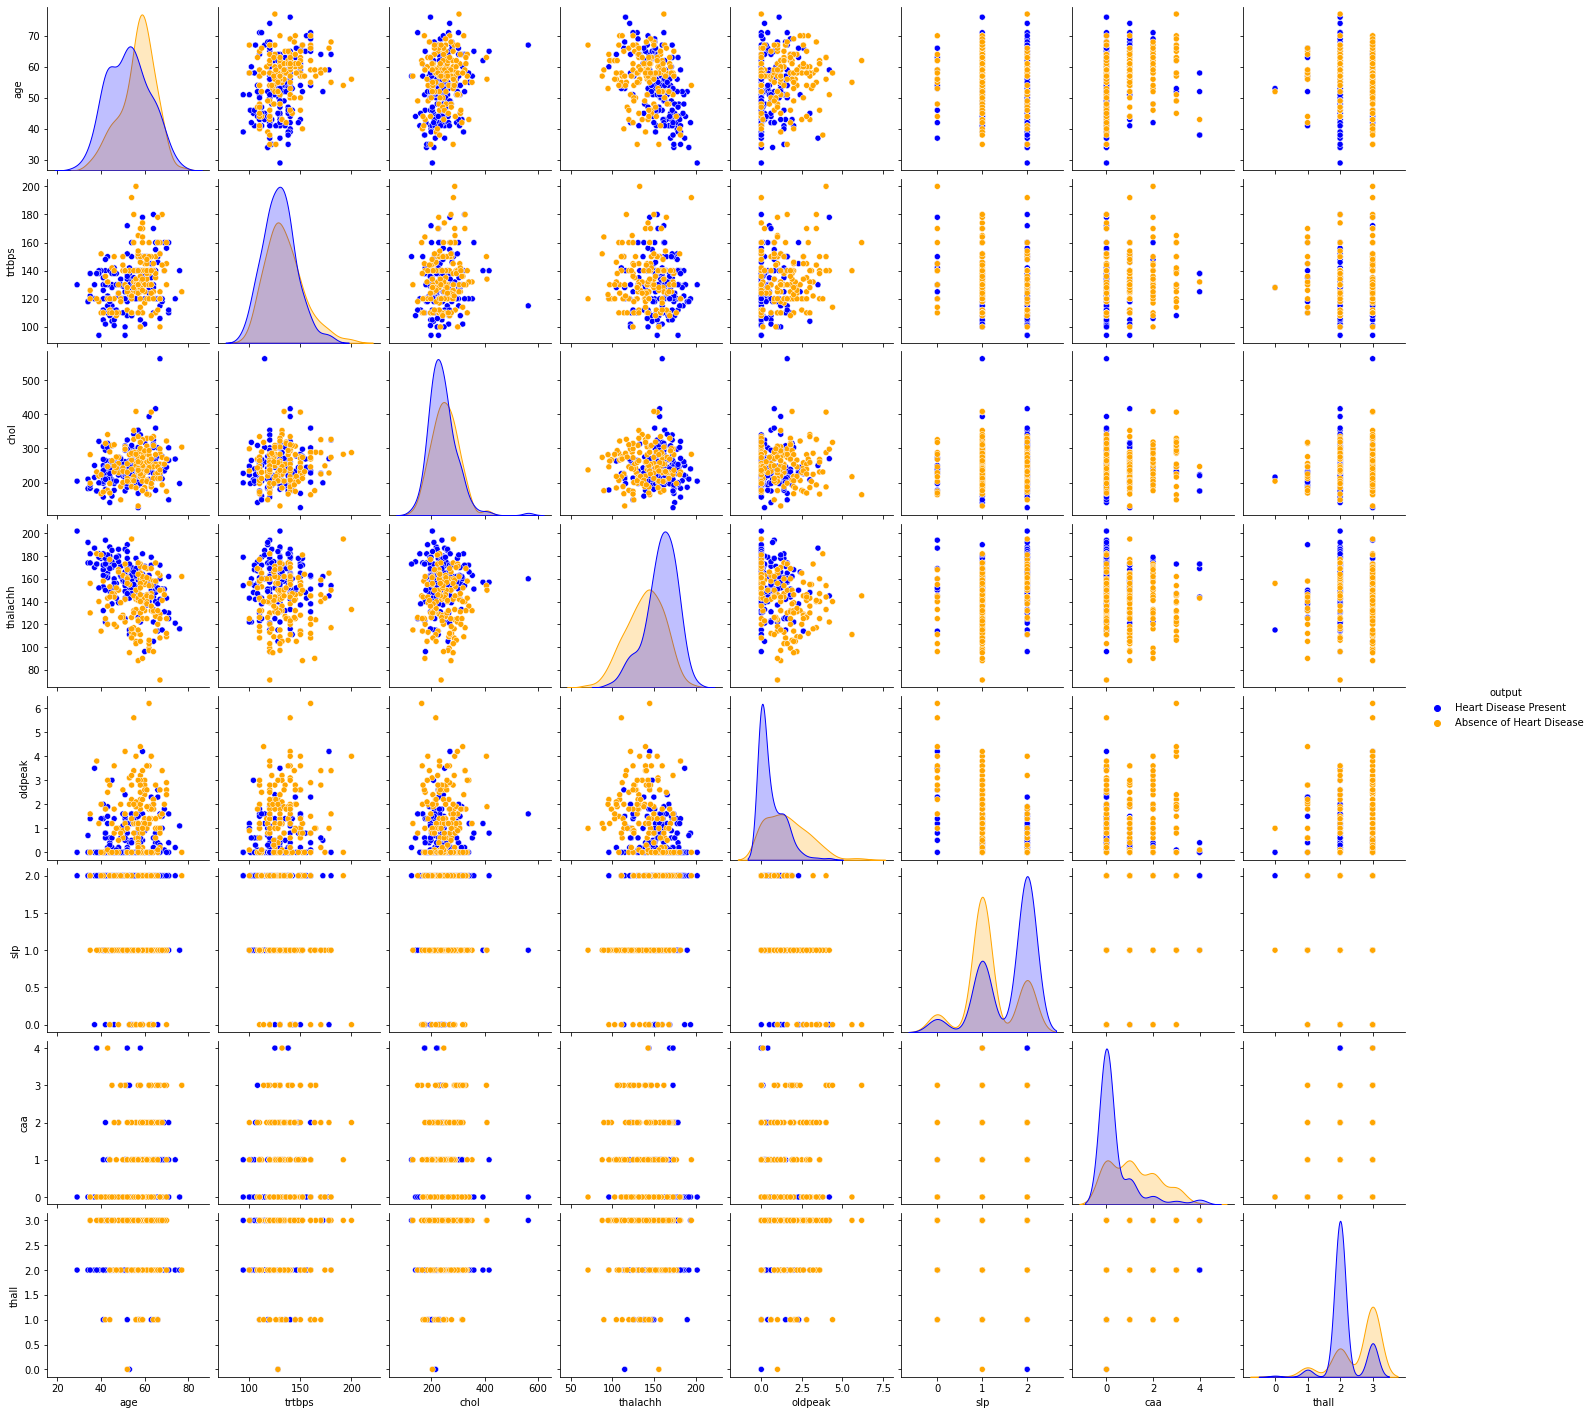

In [41]:
sns.pairplot(data,hue='output',palette = ["blue","orange"])
plt.show()

# Heart Disease Prediction
### Sandardizing 

In [160]:
#Splitting the data
x = data2.iloc[:, :-1].values
y = data2.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Classifer Models

In [161]:
key = ['GaussianNB', 'LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'XGBClassifier'  ]
value = [GaussianNB(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), XGBClassifier()]

cf = dict(zip(key,value))
print(cf)

{'GaussianNB': GaussianNB(), 'LogisticRegression': LogisticRegression(), 'RandomForestClassifier': RandomForestClassifier(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'GradientBoostingClassifier': GradientBoostingClassifier(), 'XGBClassifier': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)}


### Accuracy Score

In [165]:
cf_predict = []
for name, alg in cf.items():
    model = alg
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    cf_predict.append(acc)
    
    print(name + ' Accuracy Score: ', acc)

GaussianNB Accuracy Score:  0.8524590163934426
LogisticRegression Accuracy Score:  0.8524590163934426
RandomForestClassifier Accuracy Score:  0.8360655737704918
DecisionTreeClassifier Accuracy Score:  0.7213114754098361
GradientBoostingClassifier Accuracy Score:  0.8032786885245902
[22:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Accuracy Score:  0.7868852459016393


### Precision Score

In [163]:
cf_predict_ps = []
for name, alg in cf.items():
    model = alg
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    ps = precision_score(y_test, predict)
    cf_predict.append(ps)
    
    print(name + ' Precision Score: ', ps)
    

GaussianNB Precision Score:  0.8378378378378378
LogisticRegression Precision Score:  0.8378378378378378
RandomForestClassifier Precision Score:  0.8823529411764706
DecisionTreeClassifier Precision Score:  0.8064516129032258
GradientBoostingClassifier Precision Score:  0.8235294117647058
[22:32:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Precision Score:  0.8181818181818182


### Recall Score

In [164]:
cf_predict_rs = []
for name, alg in cf.items():
    model = alg
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    rs = recall_score(y_test, predict)
    cf_predict.append(rs)
    
    print(name + ' Recall Score: ', rs)

GaussianNB Recall Score:  0.9117647058823529
LogisticRegression Recall Score:  0.9117647058823529
RandomForestClassifier Recall Score:  0.8235294117647058
DecisionTreeClassifier Recall Score:  0.7352941176470589
GradientBoostingClassifier Recall Score:  0.8235294117647058
[22:32:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Recall Score:  0.7941176470588235


## Tuning Models

In [185]:
NB = GaussianNB()
LR = LogisticRegression()
RF = RandomForestClassifier()
DT = DecisionTreeClassifier()
GB = GradientBoostingClassifier()
XG = XGBClassifier()


NB.fit(x_train, y_train)
LR.fit(x_train, y_train)
RF.fit(x_train, y_train)
DT.fit(x_train, y_train)
GB.fit(x_train, y_train)
XG.fit(x_train, y_train)

NB_pred = NB.predict(x_test)
LR_pred = LR.predict(x_test)
RF_pred = RF.predict(x_test)
DT_pred = DT.predict(x_test)
GB_pred = GB.predict(x_test)
XG_pred = XG.predict(x_test)

print("+++++ FINAL ACCURACY SCORES +++++")
print("GaussianNB Accuracy: ", accuracy_score(y_test, NB_pred))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, LR_pred))
print("Random Forest Accuracy: ", accuracy_score(y_test, RF_pred))
print("Decision Tree Accuracy: ", accuracy_score(y_test, DT_pred))
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, GB_pred))
print("XGBoost Accuracy: ", accuracy_score(y_test, XG_pred))

print("+++++ FINAL PRECISION SCORES +++++")
print("GaussianNB Precision: ", precision_score(y_test, NB_pred))
print("Logistic Regression Precision: ", precision_score(y_test, LR_pred))
print("Random Forest Precision: ", precision_score(y_test, RF_pred))
print("Decision Tree Precision: ", precision_score(y_test, DT_pred))
print("Gradient Boosting Precision: ", precision_score(y_test, GB_pred))
print("XGBoost Precision: ", precision_score(y_test, XG_pred))

print("+++++ FINAL RECALL SCORES +++++")
print("GaussianNB Recall: ", recall_score(y_test, NB_pred))
print("Logistic Regression Recall: ", recall_score(y_test, LR_pred))
print("Random Forest Recall: ", recall_score(y_test, RF_pred))
print("Decision Tree Recall: ", recall_score(y_test, DT_pred))
print("Gradient Boosting Recall: ", recall_score(y_test, GB_pred))
print("XGBoost Recall: ", recall_score(y_test, XG_pred))

[17:44:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
+++++ FINAL ACCURACY SCORES +++++
GaussianNB Accuracy:  0.8524590163934426
Logistic Regression Accuracy:  0.8524590163934426
Random Forest Accuracy:  0.8852459016393442
Decision Tree Accuracy:  0.7377049180327869
Gradient Boosting Accuracy:  0.8032786885245902
XGBoost Accuracy:  0.7868852459016393
+++++ FINAL PRECISION SCORES +++++
GaussianNB Precision:  0.8378378378378378
Logistic Regression Precision:  0.8378378378378378
Random Forest Precision:  0.8857142857142857
Decision Tree Precision:  0.8214285714285714
Gradient Boosting Precision:  0.8235294117647058
XGBoost Precision:  0.8181818181818182
+++++ FINAL RECALL SCORES +++++
GaussianNB Recall:  0.9117647058823529
Logistic Regression Recall:  0.9117647058823529
Random Forest Recall:  0

* Random Forest Classifier had the highest accuracy score at 88.52% after tuning.
* Random Forest Classifier had the highest precision score at 88.57% after tuning.
* GaussianNB, Logistic Regression, and Random Forest Classifier had the highest recall scores at 91.17% after tuning.

## Best Fit Visualizations

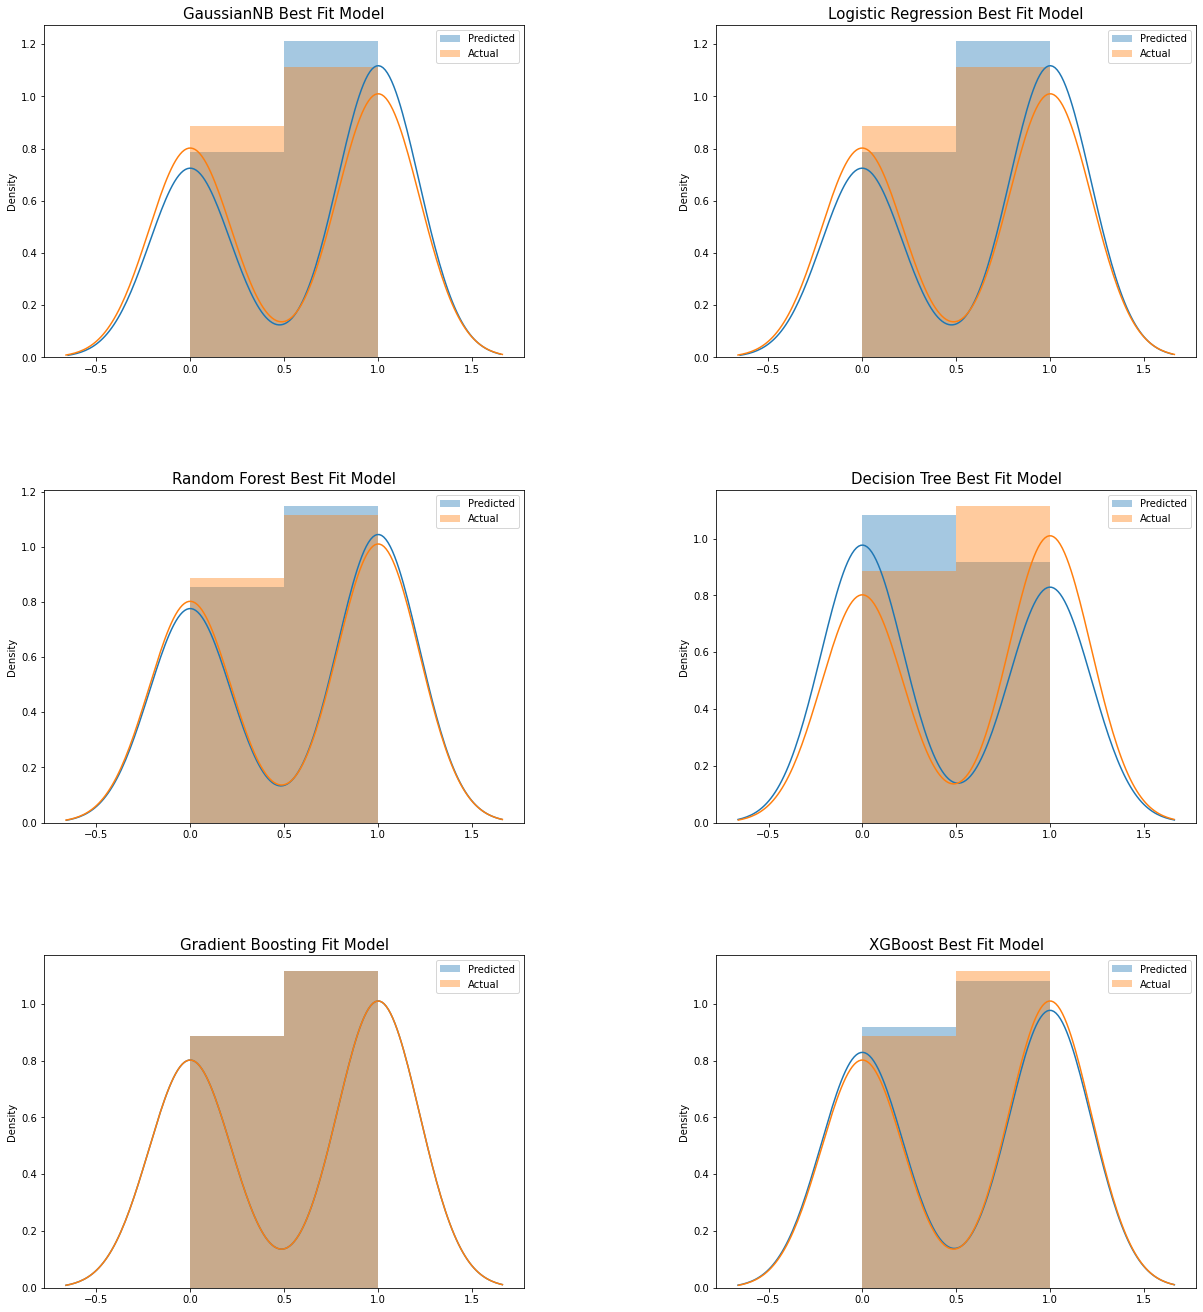

In [187]:
plt.figure(figsize = (20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(4,2,1)
plt.title('GaussianNB Best Fit Model',fontsize=15)
sns.distplot(NB_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')
plt.legend()

plt.subplot(4,2,2)
plt.title('Logistic Regression Best Fit Model',fontsize=15)
sns.distplot(LR_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')
plt.legend()

plt.subplot(4,2,3)
plt.title('Random Forest Best Fit Model',fontsize=15)
sns.distplot(RF_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')
plt.legend()

plt.subplot(4,2,4)
plt.title('Decision Tree Best Fit Model',fontsize=15)
sns.distplot(DT_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')
plt.legend()

plt.subplot(4,2,5)
plt.title('Gradient Boosting Fit Model',fontsize=15)
sns.distplot(GB_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')
plt.legend()

plt.subplot(4,2,6)
plt.title('XGBoost Best Fit Model',fontsize=15)
sns.distplot(XG_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')
plt.legend()